In [14]:
import warnings;
warnings.filterwarnings('ignore');
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(classification_report(y_test,y_pred))



Training set score: 0.781
Test set score: 0.771
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       125
           1       0.72      0.57      0.63        67

   micro avg       0.77      0.77      0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192



In [5]:
import warnings;
warnings.filterwarnings('ignore');
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))


Training set accuracy: 0.700
Test set accuracy: 0.703


c:\users\aditya pathak\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set accuracy: 0.785
Test set accuracy: 0.766
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       125
           1       0.70      0.58      0.63        67

   micro avg       0.77      0.77      0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



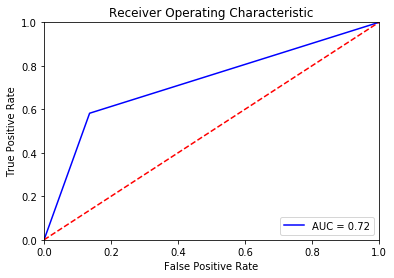

In [5]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)

import warnings;
warnings.filterwarnings('ignore');
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))
y_pred = logreg100.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



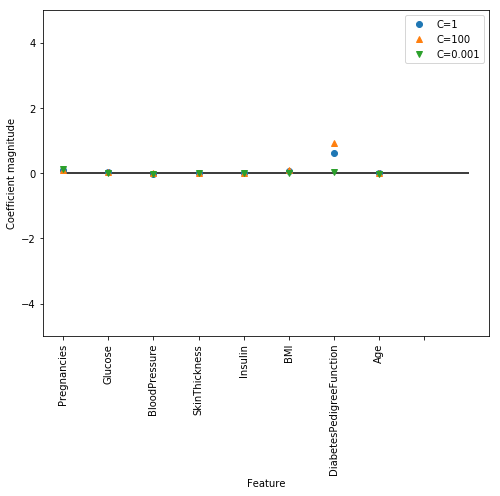

In [9]:
import warnings;
warnings.filterwarnings('ignore');
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')
